<a href="https://colab.research.google.com/github/shawonsaha15/Diabetes_ML_Research/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/Type 2 Diabetes.csv')

In [21]:
# Duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Remove duplicate rows
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print(f"Duplicates removed. New shape: {df.shape}")

Number of duplicate rows: 0
Duplicates removed. New shape: (6499, 22)


In [22]:
# Basic info
print("===== Basic Dataset Info =====")
display(df.info())
print("\n===== Descriptive Statistics =====")
display(df.describe(include='all').transpose())

===== Basic Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   varId            6499 non-null   object 
 1   alt              6499 non-null   object 
 2   ancestry         6499 non-null   object 
 3   beta             6499 non-null   float64
 4   chromosome       6499 non-null   object 
 5   dataset          6499 non-null   object 
 6   eaf              6499 non-null   float64
 7   maf              6499 non-null   float64
 8   multiAllelic     6499 non-null   bool   
 9   n                6499 non-null   float64
 10  pValue           6499 non-null   float64
 11  phenotype        6499 non-null   object 
 12  position         6499 non-null   int64  
 13  reference        6499 non-null   object 
 14  stdErr           6499 non-null   float64
 15  unscaled_beta    6499 non-null   float64
 16  unscaled_stdErr  6499 non-nul

None


===== Descriptive Statistics =====


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
varId,6499,3860,10:114758349:C:T,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alt,6499,17,A,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ancestry,6499,5,EU,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beta,6499.0,NaN,NaN,NaN,0.005096,1.387343,-36.4455,-0.119372,0.0875,0.185222,49.2388
chromosome,6499,23,6,1426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,6499,8,Mansour2021_DiabetesSubtypes_EU,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eaf,6499.0,NaN,NaN,NaN,0.482267,0.24861,0.0066,0.27885,0.4477,0.646321,0.999925
maf,6499.0,NaN,NaN,NaN,0.287966,0.130982,0.000076,0.193558,0.305942,0.401489,0.5
multiAllelic,6499,1,False,6499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n,6499.0,NaN,NaN,NaN,65007.114918,80300.889806,1552.3004,5602.5576,44692.895,75632.37,254373.33


In [23]:
# Show missing value summary only for columns with missing values
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

print("===== Missing Values per Column (only columns with missing data) =====")
display(missing_summary)

# Define threshold — drop columns with >30% missing data
threshold = 0.3  # 30%
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()

# Drop high-missing columns
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)
    print(f"Dropped columns with >30% missing values: {cols_to_drop}")
else:
    print("No columns exceeded 30% missing threshold.")


===== Missing Values per Column (only columns with missing data) =====


,0
minorAllele,141
dbSNP,23
consequence,7


No columns exceeded 30% missing threshold.


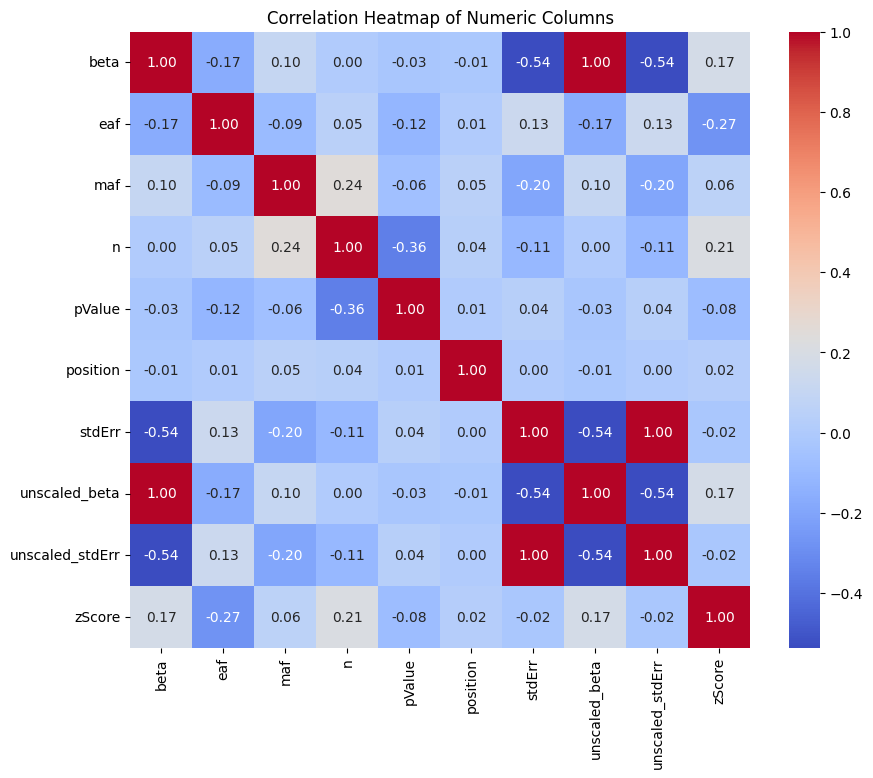

In [24]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=np.number).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

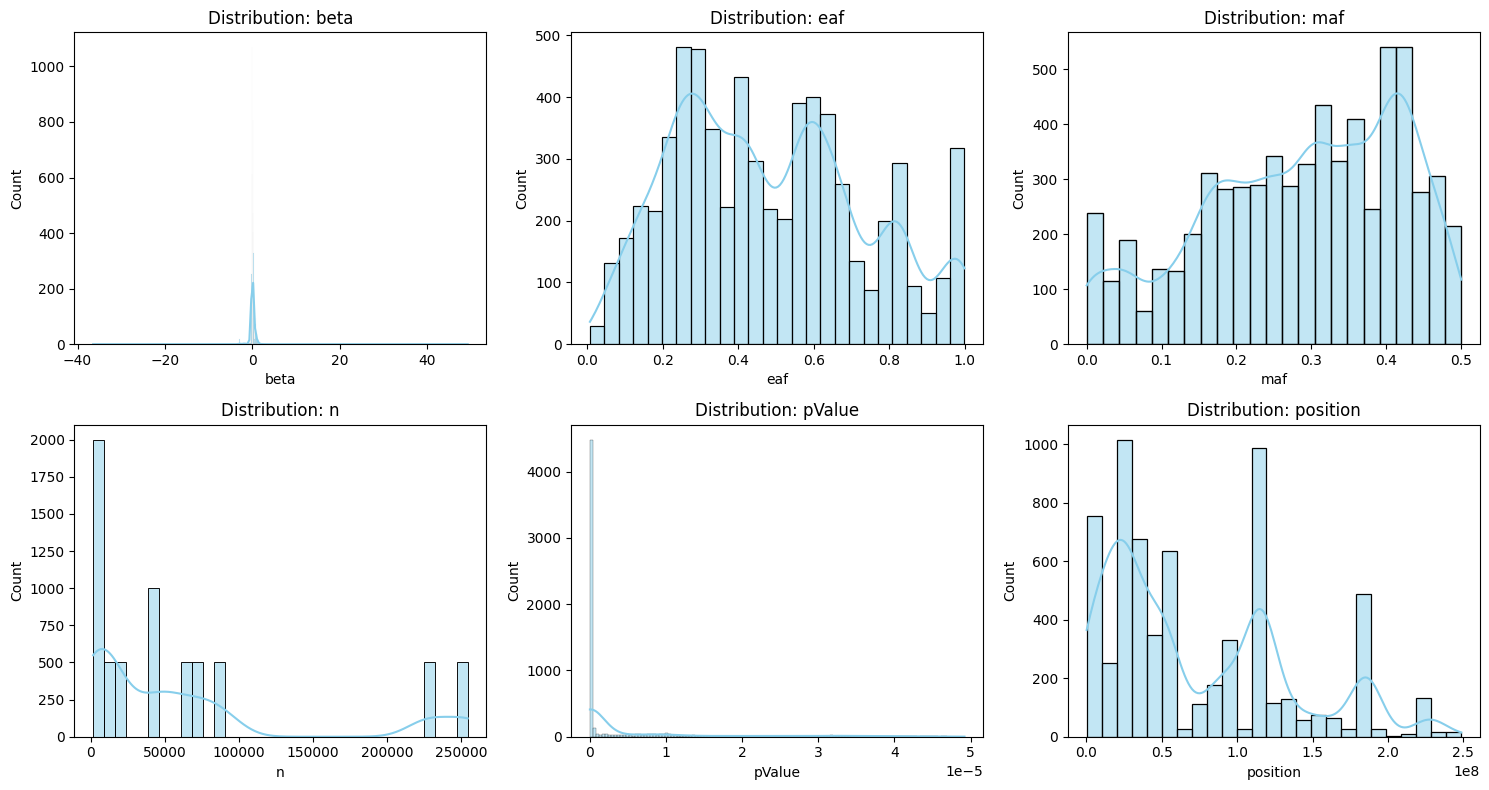

In [25]:
# Distribution plots (grouped)
cols_to_plot = numeric_cols[:min(6, len(numeric_cols))]  # limit for clarity
num_cols = len(cols_to_plot)
ncols = 3
nrows = int(np.ceil(num_cols / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*nrows))
axes = axes.flatten()
for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution: {col}")
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

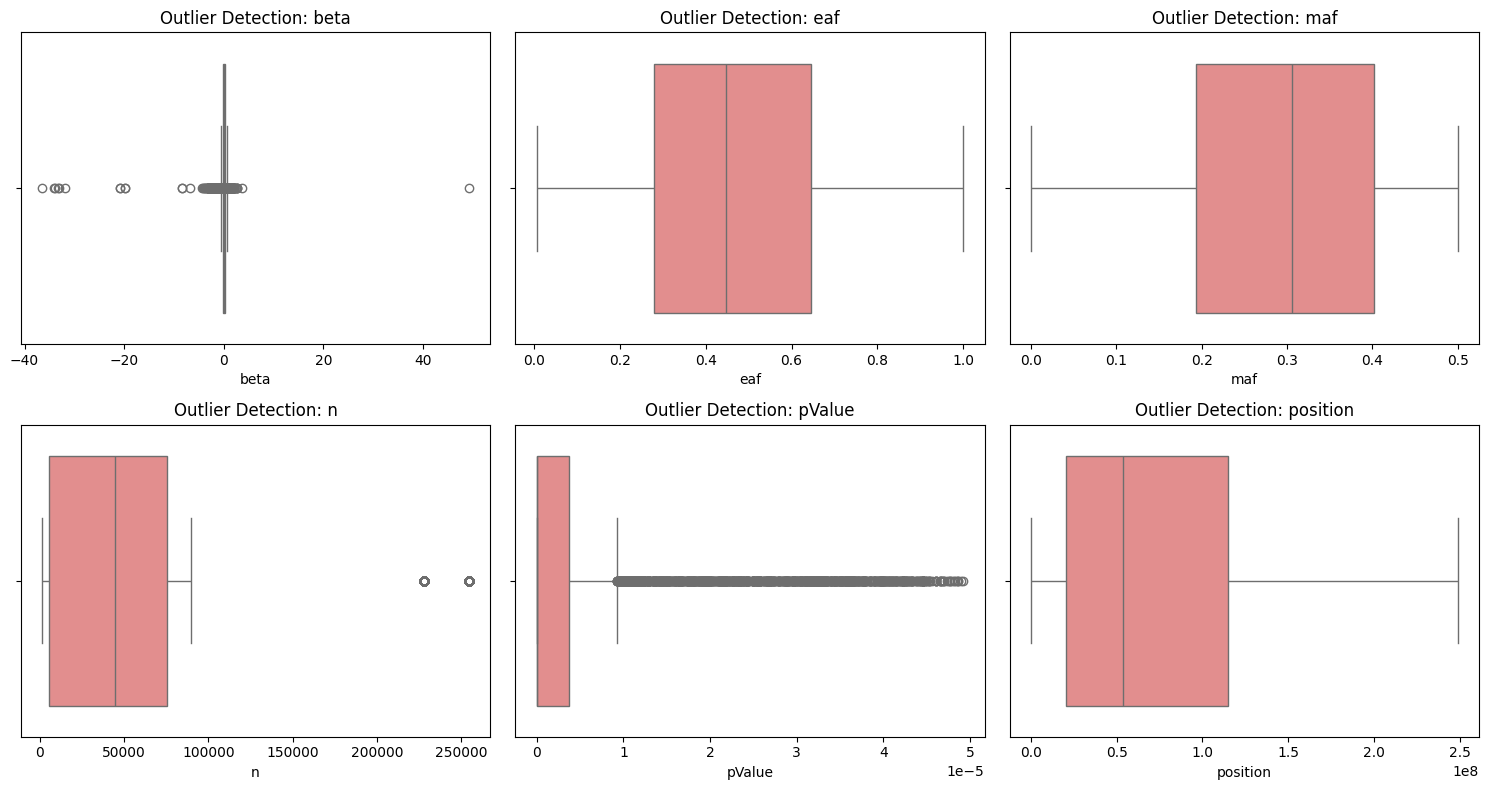

In [26]:
# Outlier boxplots (grouped)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4*nrows))
axes = axes.flatten()
for i, col in enumerate(cols_to_plot):
    sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f"Outlier Detection: {col}")
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

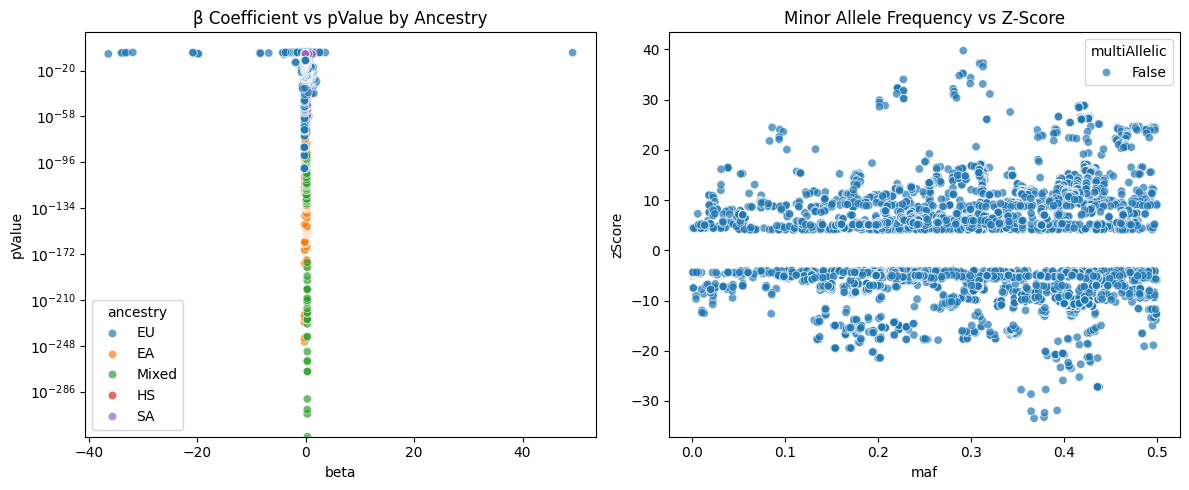

In [27]:
# Key relationships (combined multi-panel)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x='beta', y='pValue', hue='ancestry', alpha=0.7, ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_title("β Coefficient vs pValue by Ancestry")

sns.scatterplot(data=df, x='maf', y='zScore', hue='multiAllelic', alpha=0.7, ax=axes[1])
axes[1].set_title("Minor Allele Frequency vs Z-Score")
plt.tight_layout()
plt.show()

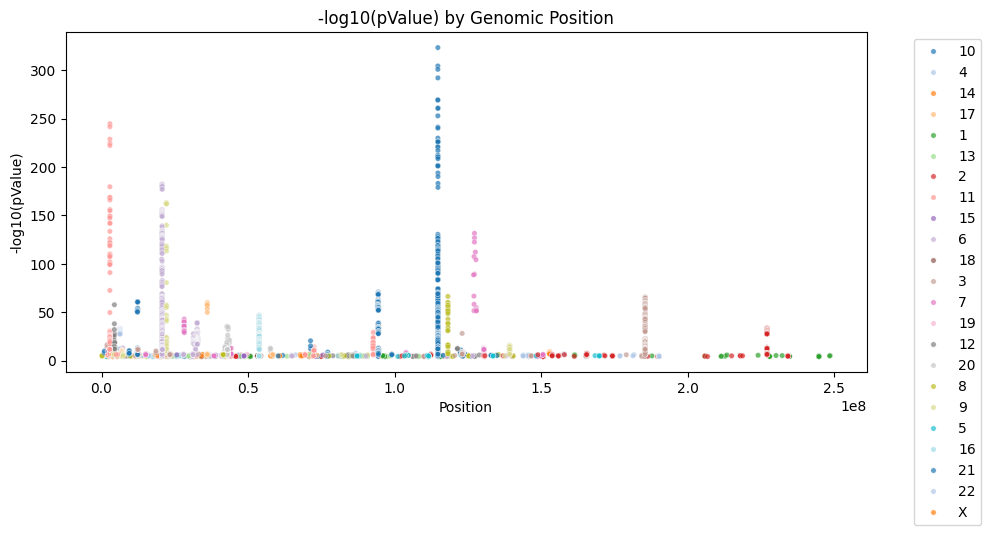

In [28]:
# pValue Manhattan-like plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='position', y=-np.log10(df['pValue']),
                hue='chromosome', s=15, alpha=0.7, palette='tab20')
plt.title('-log10(pValue) by Genomic Position')
plt.xlabel('Position')
plt.ylabel('-log10(pValue)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

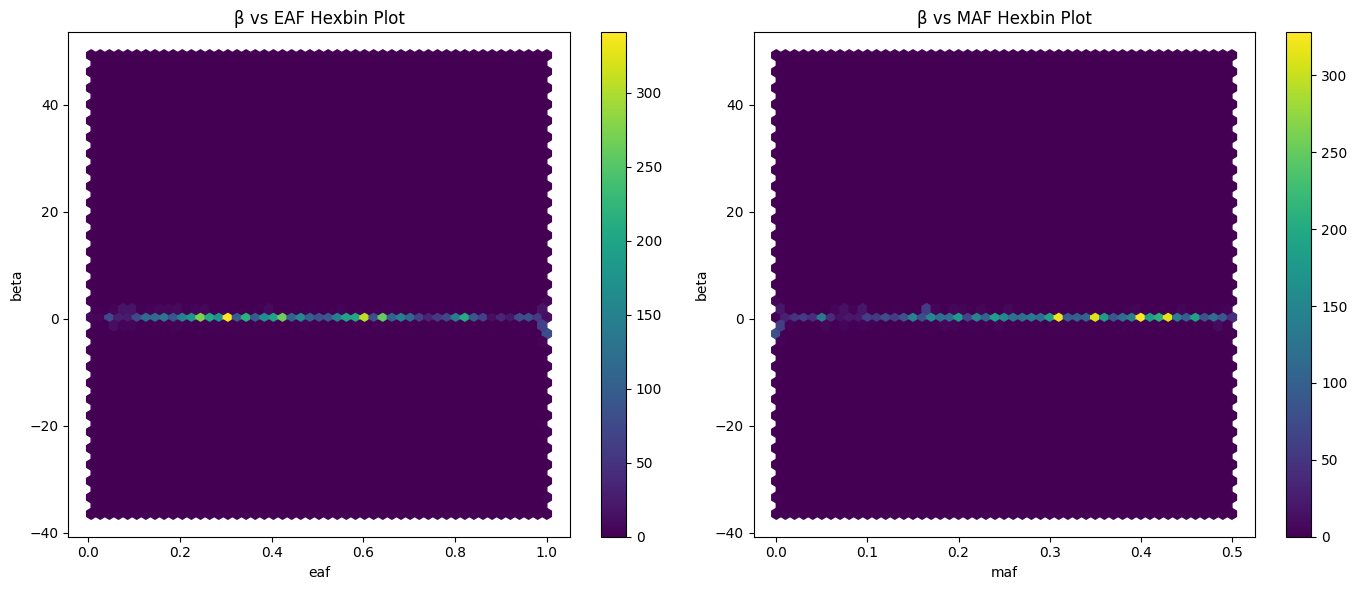

In [29]:
# β vs EAF/MAF joint relationship
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: β vs eaf
hb1 = axes[0].hexbin(df['eaf'], df['beta'], gridsize=50, cmap='viridis')
axes[0].set_xlabel('eaf')
axes[0].set_ylabel('beta')
axes[0].set_title('β vs EAF Hexbin Plot')
cb1 = fig.colorbar(hb1, ax=axes[0])

# Plot 2: β vs maf
hb2 = axes[1].hexbin(df['maf'], df['beta'], gridsize=50, cmap='viridis')
axes[1].set_xlabel('maf')
axes[1].set_ylabel('beta')
axes[1].set_title('β vs MAF Hexbin Plot')
cb2 = fig.colorbar(hb2, ax=axes[1])

plt.tight_layout()
plt.show()


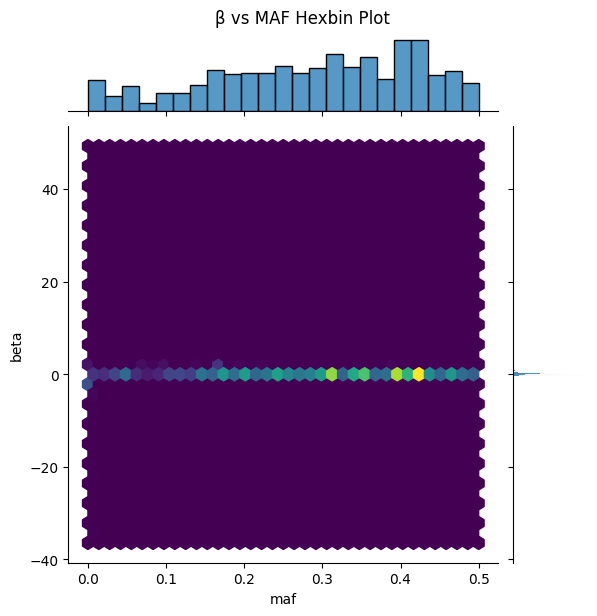

In [30]:
# β vs MAF joint relationship
sns.jointplot(data=df, x='maf', y='beta', kind='hex', cmap='viridis')
plt.suptitle("β vs MAF Hexbin Plot", y=1.02)
plt.show()